In [1]:
cd datasets/NLS

C:\Users\Daniele\Desktop\Materiale Tesi\Tesi magistrale\datasets\NLS


# Import

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Aggiungo gli headers al CSV
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('KDDTrain+.csv', encoding='cp1252', names = col_names)
df_test = pd.read_csv('KDDTest+.csv', encoding='cp1252', names = col_names)

labeldf=df['label']
labeldf_test=df_test['label']

C:\Users\Daniele\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Daniele\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Daniele\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
#Dataset Preparation ----------------------------------------------------------------------------------------------------------

def prepareMulticlass():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
    return newlabeldf, newlabeldf_test

def prepareBinary():
    # change the label column
    newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})
    return newlabeldf, newlabeldf_test
  
colNames=list()
colNames_test=list()

def getFullDf():
    global colNames
    colNames=list(df)
    return df

def getFullDfTest():
    global colNames_test
    colNames_test=list(df_test)
    return df_test

def getReducedDf():
    global colNames
    df_reduced=df.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames=list(df_reduced)
    return df_reduced

def getReducedDfTest():
    global colNames_test
    df_reduced=df_test.drop('protocol_type', axis=1, inplace=False)
    df_reduced=df_reduced.drop('service', axis=1, inplace=False)
    df_reduced=df_reduced.drop('flag', axis=1, inplace=False)
    colNames_test=list(df_reduced)
    return df_reduced

def oneHotEcoding(df, column_name):
    df_drop = df.drop(column_name, axis=1, inplace=False)
    one_hot = pd.get_dummies(df[column_name])
    if(column_name == 'service'):
        column_list=list()
        for string in one_hot.columns.tolist():
            column_list.append(column_name+'_'+str(string))
        one_hot.columns=column_list
    df = pd.concat([df_drop, one_hot], axis=1)
    
    return df

def getXandY(df):
    X = df.drop('label',axis=1, inplace=False)
    Y = df.label
    return X, Y

def overSampledDF(X, Y): 
    sm = SMOTE(random_state=42)
    X_resampled, Y_resampled = sm.fit_resample(X, Y)
    df = pd.concat([X_resampled, Y_resampled], axis=1)
    return df

def createMulticlassDF(df):
    to_drop_DoS = [0,1]
    to_drop_Probe = [0,2]
    to_drop_R2L = [0,3]
    to_drop_U2R = [0,4]

    DoS_df=df[df['label'].isin(to_drop_DoS)];
    Probe_df=df[df['label'].isin(to_drop_Probe)];
    R2L_df=df[df['label'].isin(to_drop_R2L)];
    U2R_df=df[df['label'].isin(to_drop_U2R)];
    return DoS_df, Probe_df, R2L_df, U2R_df 

def standardScaler(df):
    scaler = preprocessing.StandardScaler().fit(df)
    return scaler.transform(df) 

def minMaxScaler(df):
    scaler = preprocessing.MinMaxScaler().fit(df)
    return scaler.transform(df)

def recursiveFeatureExtraction(model, X, Y, n):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X, Y)
    X=rfe.transform(X)
    true=rfe.support_
    rfecolindex=[i for i, x in enumerate(true) if x]
    rfecolname=list(colNames[i] for i in rfecolindex)
    return X, rfecolindex

def adaptTestset(train, test):
    train_service_list=[]
    test_service_list = []
    
    for string in train.columns.tolist():
        if('service' in string):
            train_service_list.append(string)
    
    for string in test.columns.tolist():
        if('service' in string):
            test_service_list.append(string)

    difference=list(set(train_service_list) - set(test_service_list))

    for col in difference:
        test[col] = 0
    return test.reindex(columns=train.columns)

# Algorythms-------------------------------------------------------------------------------------------------------------------- 

def kNN(X, Y):
    clf = KNeighborsClassifier()
    return clf.fit(X, Y)

def stratifiedCV(model, X, Y, k, pos_label):
    skf = StratifiedKFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}
  
    
def KfoldCV(model, X, Y, k, pos_label):
    skf = KFold(n_splits=k)
  
    precision_test_sum = 0
    recall_test_sum = 0
    f1_test_sum = 0
    accuracy_test_sum = 0  
    precision_train_sum = 0
    recall_train_sum = 0
    f1_train_sum = 0
    accuracy_train_sum = 0 

    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        test_accuracy = accuracy_score(y_test, y_test_pred )
        test_precision = precision_score(y_test, y_test_pred, pos_label=pos_label)
        test_recall = recall_score(y_test, y_test_pred, pos_label=pos_label)
        test_f1 = f1_score(y_test, y_test_pred, pos_label=pos_label)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, pos_label=pos_label)
        train_recall = recall_score(y_train, y_train_pred, pos_label=pos_label)
        train_f1 = f1_score(y_train, y_train_pred, pos_label=pos_label)
    
        accuracy_test_sum += test_accuracy
        precision_test_sum += test_precision
        recall_test_sum += test_recall
        f1_test_sum += test_f1

        accuracy_train_sum += train_accuracy
        precision_train_sum += train_precision
        recall_train_sum += train_recall
        f1_train_sum += train_f1

        train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==pos_label])
        test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==pos_label])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

    accuracy_test_mean = accuracy_test_sum / skf.n_splits 
    precision_test_mean = precision_test_sum / skf.n_splits
    recall_test_mean = recall_test_sum / skf.n_splits
    f1_test_mean = f1_test_sum / skf.n_splits

    accuracy_train_mean = accuracy_train_sum / skf.n_splits 
    precision_train_mean = precision_train_sum / skf.n_splits
    recall_train_mean = recall_train_sum / skf.n_splits
    f1_train_mean = f1_train_sum / skf.n_splits

    return {"Mean Training Accuracy": accuracy_train_mean,
      "Mean Training Precision": precision_train_mean,
      "Mean Training Recall": recall_train_mean,
      "Mean Training F1 Score": f1_train_mean,
      "Mean Validation Accuracy": accuracy_test_mean,
      "Mean Validation Precision": precision_test_mean,
      "Mean Validation Recall": recall_test_mean,
      "Mean Validation F1 Score": f1_test_mean}

#Plotting-----------------------------------------------------------------------------------------------------------------------

def plotDf(y):
    plt.figure(figsize=(10,5))
    class_distribution = y.value_counts()
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title('Distribution of yi in train data')
    plt.grid()
    return plt

def plotConfusionMatrix(Y_pred, Y_test, pos_label):
    skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
    plt.show()
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy: %0.5f " % accuracy)
    precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
    print("Precision: %0.5f " % precision)
    recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
    print("Recall: %0.5f " % recall)
    f = f1_score(Y_test, Y_pred, pos_label=pos_label)
    print("F-measure: %0.5f " % f)

# Reduced DF, no oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

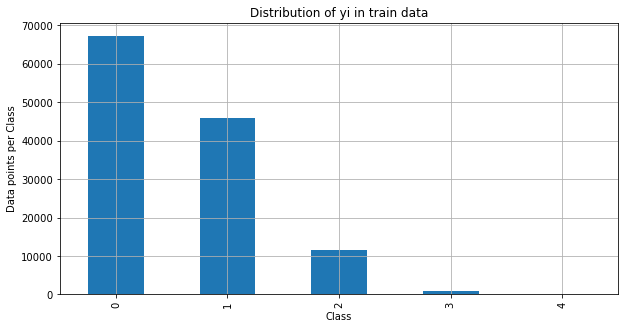

In [4]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

plotDf(reducedDf['label'])


In [5]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(reducedDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(reducedDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [6]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [7]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9990818398516819,
 'Mean Training Precision': 0.9983469480069289,
 'Mean Training Recall': 0.9993903208759134,
 'Mean Training F1 Score': 0.9988683599299177,
 'Mean Validation Accuracy': 0.9987551867219917,
 'Mean Validation Precision': 0.9979117355910668,
 'Mean Validation Recall': 0.9990203904479589,
 'Mean Validation F1 Score': 0.9984656670165986}

#### K-fold cross validation on dos Standard Scaler

In [8]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9986237407178523,
 'Mean Training Precision': 0.9979618555922951,
 'Mean Training Recall': 0.9986451574664645,
 'Mean Training F1 Score': 0.998303380699466,
 'Mean Validation Accuracy': 0.9964333009623025,
 'Mean Validation Precision': 0.994469078574251,
 'Mean Validation Recall': 0.9967518030154586,
 'Mean Validation F1 Score': 0.9956086734552653}

#### Stratified cross validation on dos

In [9]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9990838017323407,
 'Mean Training Precision': 0.99834934867519,
 'Mean Training Recall': 0.9993927560024624,
 'Mean Training F1 Score': 0.9988707781993554,
 'Mean Validation Accuracy': 0.9987463582590271,
 'Mean Validation Precision': 0.9979122014849308,
 'Mean Validation Recall': 0.9989984048214563,
 'Mean Validation F1 Score': 0.998454946323208}

#### Stratified cross validation on dos Standard Scaler

In [10]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9986207978968642,
 'Mean Training Precision': 0.9979595221949656,
 'Mean Training Recall': 0.9986403545191125,
 'Mean Training F1 Score': 0.9982998133826515,
 'Mean Validation Accuracy': 0.9964068155734086,
 'Mean Validation Precision': 0.9943978055780829,
 'Mean Validation Recall': 0.9967557100981572,
 'Mean Validation F1 Score': 0.9955747689911718}

#### Predict on dos

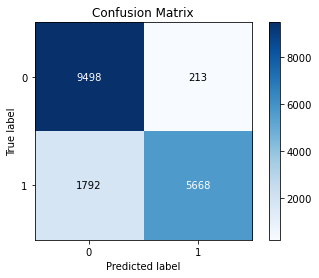

Accuracy: 0.88323 
Precision: 0.96378 
Recall: 0.75979 
F-measure: 0.84971 


In [11]:
y_dos_prediction = kNN(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

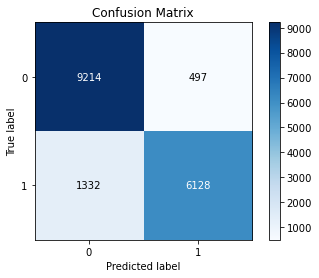

Accuracy: 0.89348 
Precision: 0.92498 
Recall: 0.82145 
F-measure: 0.87015 


In [12]:
y_dos_prediction = kNN(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [13]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9969001012613123,
 'Mean Training Precision': 0.9861126199322252,
 'Mean Training Recall': 0.9929744185442131,
 'Mean Training F1 Score': 0.9895315461060086,
 'Mean Validation Accuracy': 0.9957720894008375,
 'Mean Validation Precision': 0.9811153752621797,
 'Mean Validation Recall': 0.9903565586362104,
 'Mean Validation F1 Score': 0.9857059005856034}

#### K-fold cross validation on probe Standard Scaler

In [14]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.997364242434565,
 'Mean Training Precision': 0.9916115063665638,
 'Mean Training Recall': 0.9905150284498184,
 'Mean Training F1 Score': 0.9910627857393683,
 'Mean Validation Accuracy': 0.9960632510764862,
 'Mean Validation Precision': 0.9875087019727937,
 'Mean Validation Recall': 0.9857081452714939,
 'Mean Validation F1 Score': 0.9866010248310456}

#### Stratified cross validation on probe

In [15]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9969001012613123,
 'Mean Training Precision': 0.9861126640291177,
 'Mean Training Recall': 0.9929745301683525,
 'Mean Training F1 Score': 0.9895316237655697,
 'Mean Validation Accuracy': 0.9957847476286854,
 'Mean Validation Precision': 0.9812389141911799,
 'Mean Validation Recall': 0.9903914192536754,
 'Mean Validation F1 Score': 0.9857861045145266}

#### Stratified cross validation on probe Standard Scaler

In [16]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9973628359450222,
 'Mean Training Precision': 0.9916118785626363,
 'Mean Training Recall': 0.9905056111012218,
 'Mean Training F1 Score': 0.9910582935370427,
 'Mean Validation Accuracy': 0.9960505928486381,
 'Mean Validation Precision': 0.9875516108599506,
 'Mean Validation Recall': 0.9856729657903841,
 'Mean Validation F1 Score': 0.9866047901172535}

#### Predict on probe

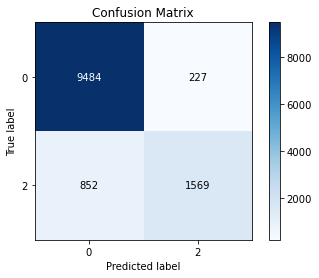

Accuracy: 0.91106 
Precision: 0.87361 
Recall: 0.64808 
F-measure: 0.74413 


In [17]:
y_probe_prediction = kNN(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

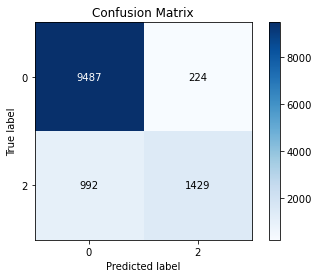

Accuracy: 0.89977 
Precision: 0.86449 
Recall: 0.59025 
F-measure: 0.70152 


In [18]:
y_probe_prediction = kNN(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [19]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.998970802083847,
 'Mean Training Precision': 0.9719873393135134,
 'Mean Training Recall': 0.956894697198259,
 'Mean Training F1 Score': 0.9643770399948549,
 'Mean Validation Accuracy': 0.9985952354428645,
 'Mean Validation Precision': 0.9568310348216151,
 'Mean Validation Recall': 0.9471053204395808,
 'Mean Validation F1 Score': 0.9518161095395637}

#### K-fold cross validation on r2l Standard Scaler

In [20]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9982131301918636,
 'Mean Training Precision': 0.9407685567517126,
 'Mean Training Recall': 0.9362137140134713,
 'Mean Training F1 Score': 0.938469915501499,
 'Mean Validation Accuracy': 0.997336759526718,
 'Mean Validation Precision': 0.908639348526002,
 'Mean Validation Recall': 0.9084174799575162,
 'Mean Validation F1 Score': 0.9079658912170092}

#### Stratified cross validation on r2l

In [21]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9989708021102824,
 'Mean Training Precision': 0.971995754735592,
 'Mean Training Recall': 0.9568957003192338,
 'Mean Training F1 Score': 0.9643826891995875,
 'Mean Validation Accuracy': 0.9985806048655835,
 'Mean Validation Precision': 0.9558074461987924,
 'Mean Validation Recall': 0.9467171717171716,
 'Mean Validation F1 Score': 0.9510956762204156}

#### Stratified cross validation on r2l Standard Scaler

In [22]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9982163820393188,
 'Mean Training Precision': 0.9409010713109115,
 'Mean Training Recall': 0.9363490123703112,
 'Mean Training F1 Score': 0.938606548353748,
 'Mean Validation Accuracy': 0.9972782329346371,
 'Mean Validation Precision': 0.9065981775457974,
 'Mean Validation Recall': 0.9075151515151514,
 'Mean Validation F1 Score': 0.9066766297058738}

#### Predict on r2l

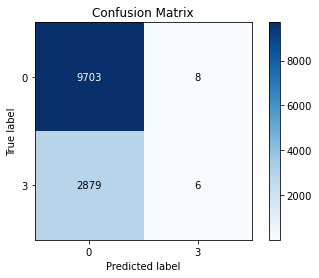

Accuracy: 0.77080 
Precision: 0.42857 
Recall: 0.00208 
F-measure: 0.00414 


In [23]:
y_r2l_prediction = kNN(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

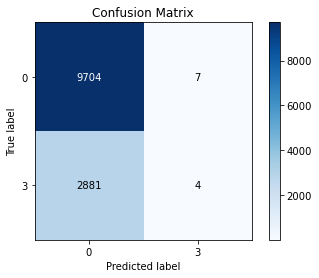

Accuracy: 0.77072 
Precision: 0.36364 
Recall: 0.00139 
F-measure: 0.00276 


In [24]:
y_r2l_prediction = kNN(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [25]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9995614576320955,
 'Mean Training Precision': 0.8891652512904387,
 'Mean Training Recall': 0.4939643585127264,
 'Mean Training F1 Score': 0.6338382241681825,
 'Mean Validation Accuracy': 0.9994064819556476,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3516666666666667,
 'Mean Validation F1 Score': 0.45071428571428573}

#### K-fold cross validation on u2r Standard Scaler

In [26]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9995268360242852,
 'Mean Training Precision': 0.825545056476091,
 'Mean Training Recall': 0.4914782953379822,
 'Mean Training F1 Score': 0.6149557974617044,
 'Mean Validation Accuracy': 0.9993619693682595,
 'Mean Validation Precision': 0.6016666666666667,
 'Mean Validation Recall': 0.3433333333333333,
 'Mean Validation F1 Score': 0.4238311688311688}

#### Stratified cross validation on u2r

In [27]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9995647549694956,
 'Mean Training Precision': 0.8876690301802505,
 'Mean Training Recall': 0.5,
 'Mean Training F1 Score': 0.6378303158671671,
 'Mean Validation Accuracy': 0.9994064819556477,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3266666666666667,
 'Mean Validation F1 Score': 0.43238095238095237}

#### Stratified cross validation on u2r Standard Scaler

In [28]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9995202414038464,
 'Mean Training Precision': 0.817399284373797,
 'Mean Training Recall': 0.4872340425531914,
 'Mean Training F1 Score': 0.6088199487020564,
 'Mean Validation Accuracy': 0.9993916429587637,
 'Mean Validation Precision': 0.6766666666666666,
 'Mean Validation Recall': 0.3433333333333334,
 'Mean Validation F1 Score': 0.4376190476190477}

#### Predict on u2r

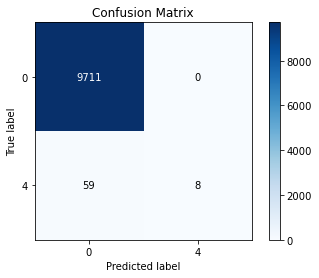

Accuracy: 0.99397 
Precision: 1.00000 
Recall: 0.11940 
F-measure: 0.21333 


In [29]:
y_u2r_prediction = kNN(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

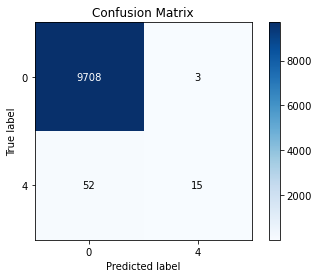

Accuracy: 0.99438 
Precision: 0.83333 
Recall: 0.22388 
F-measure: 0.35294 


In [30]:
y_u2r_prediction = kNN(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Feature Selection

In [31]:

X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [32]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [33]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9993888741747841,
 'Mean Training Precision': 0.9993224691096272,
 'Mean Training Recall': 0.9991701822713178,
 'Mean Training F1 Score': 0.9992463174908783,
 'Mean Validation Accuracy': 0.9991348106294694,
 'Mean Validation Precision': 0.9989984141020314,
 'Mean Validation Recall': 0.9988673925457332,
 'Mean Validation F1 Score': 0.9989328796310369}

#### K-fold cross validation on dos Standard Scaler

In [34]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9976182768802175,
 'Mean Training Precision': 0.9963328853321982,
 'Mean Training Recall': 0.9977985178084111,
 'Mean Training F1 Score': 0.9970651560605003,
 'Mean Validation Accuracy': 0.9946852652953121,
 'Mean Validation Precision': 0.9914911281970742,
 'Mean Validation Recall': 0.9954449732888504,
 'Mean Validation F1 Score': 0.9934627181741107}

#### Stratified cross validation on dos

In [35]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9993898551151134,
 'Mean Training Precision': 0.9993200866630007,
 'Mean Training Recall': 0.9991750192762432,
 'Mean Training F1 Score': 0.9992475442236808,
 'Mean Validation Accuracy': 0.9991348106294694,
 'Mean Validation Precision': 0.9989983478220473,
 'Mean Validation Recall': 0.9988677522832428,
 'Mean Validation F1 Score': 0.9989330239933096}

#### Stratified cross validation on dos Standard Scaler

In [36]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9976172959398879,
 'Mean Training Precision': 0.99632811636956,
 'Mean Training Recall': 0.9978008581930983,
 'Mean Training F1 Score': 0.9970639361570826,
 'Mean Validation Accuracy': 0.9946764368323475,
 'Mean Validation Precision': 0.9914809447189983,
 'Mean Validation Recall': 0.9954275167635039,
 'Mean Validation F1 Score': 0.9934485685843285}

#### Predict on dos

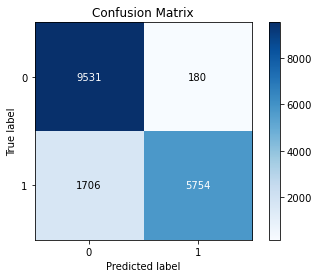

Accuracy: 0.89016 
Precision: 0.96967 
Recall: 0.77131 
F-measure: 0.85919 


In [37]:
y_dos_rfe_prediction = kNN(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

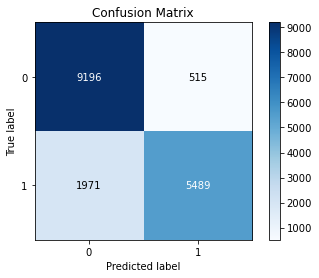

Accuracy: 0.85522 
Precision: 0.91422 
Recall: 0.73579 
F-measure: 0.81536 


In [38]:
y_dos_rfe_prediction = kNN(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [39]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9971363911286394,
 'Mean Training Precision': 0.9878964099323776,
 'Mean Training Recall': 0.9927553263832747,
 'Mean Training F1 Score': 0.9903197934572049,
 'Mean Validation Accuracy': 0.9962404454337275,
 'Mean Validation Precision': 0.9842315182054593,
 'Mean Validation Recall': 0.9903502808034718,
 'Mean Validation F1 Score': 0.9872749590450789}

#### K-fold cross validation on probe Standard Scaler

In [40]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9974556641163709,
 'Mean Training Precision': 0.990914176062897,
 'Mean Training Recall': 0.9918503854376333,
 'Mean Training F1 Score': 0.9913819241156363,
 'Mean Validation Accuracy': 0.9963290738612962,
 'Mean Validation Precision': 0.9875652033770012,
 'Mean Validation Recall': 0.9875055819782123,
 'Mean Validation F1 Score': 0.9875230895982373}

#### Stratified cross validation on probe

In [41]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9971377976181822,
 'Mean Training Precision': 0.9878964621351216,
 'Mean Training Recall': 0.9927648138915022,
 'Mean Training F1 Score': 0.9903245496724796,
 'Mean Validation Accuracy': 0.9962404454337275,
 'Mean Validation Precision': 0.9842457548681656,
 'Mean Validation Recall': 0.9903913456371145,
 'Mean Validation F1 Score': 0.9873026302843048}

#### Stratified cross validation on probe Standard Scaler

In [42]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9974556641163709,
 'Mean Training Precision': 0.9909054491987149,
 'Mean Training Recall': 0.9918592231082087,
 'Mean Training F1 Score': 0.9913819770356456,
 'Mean Validation Accuracy': 0.9963417320891444,
 'Mean Validation Precision': 0.9875867204906237,
 'Mean Validation Recall': 0.9876466257849368,
 'Mean Validation F1 Score': 0.9876043205195548}

#### Predict on probe

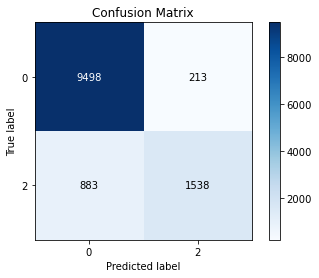

Accuracy: 0.90966 
Precision: 0.87836 
Recall: 0.63527 
F-measure: 0.73730 


In [43]:
y_probe_rfe_prediction = kNN(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

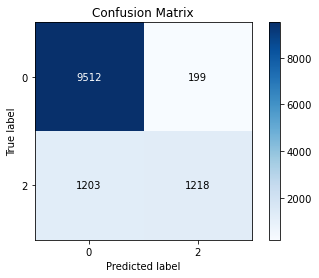

Accuracy: 0.88444 
Precision: 0.85956 
Recall: 0.50310 
F-measure: 0.63471 


In [44]:
y_probe_rfe_prediction = kNN(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [45]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.998970802083847,
 'Mean Training Precision': 0.9719873393135134,
 'Mean Training Recall': 0.956894697198259,
 'Mean Training F1 Score': 0.9643770399948549,
 'Mean Validation Accuracy': 0.9985952354428645,
 'Mean Validation Precision': 0.9568310348216151,
 'Mean Validation Recall': 0.9471053204395808,
 'Mean Validation F1 Score': 0.9518161095395637}

#### K-fold cross validation on r2l Standard Scaler

In [46]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9980879355848755,
 'Mean Training Precision': 0.9370546088948973,
 'Mean Training Recall': 0.9311915944583424,
 'Mean Training F1 Score': 0.934110507728728,
 'Mean Validation Accuracy': 0.9970148568458403,
 'Mean Validation Precision': 0.9019181057364992,
 'Mean Validation Recall': 0.891763002337617,
 'Mean Validation F1 Score': 0.896373418905377}

#### Stratified cross validation on r2l

In [47]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9989691761997725,
 'Mean Training Precision': 0.9719924313723484,
 'Mean Training Recall': 0.9567839684756583,
 'Mean Training F1 Score': 0.9643245199213034,
 'Mean Validation Accuracy': 0.9985806048655835,
 'Mean Validation Precision': 0.9558074461987924,
 'Mean Validation Recall': 0.9467171717171716,
 'Mean Validation F1 Score': 0.9510956762204156}

#### Stratified cross validation on r2l Standard Scaler

In [48]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9980928133692757,
 'Mean Training Precision': 0.9370069891216952,
 'Mean Training Recall': 0.9316591430566639,
 'Mean Training F1 Score': 0.9343208283263207,
 'Mean Validation Accuracy': 0.9970294938475552,
 'Mean Validation Precision': 0.90163998807851,
 'Mean Validation Recall': 0.8935252525252526,
 'Mean Validation F1 Score': 0.8973438798315125}

#### Predict on r2l

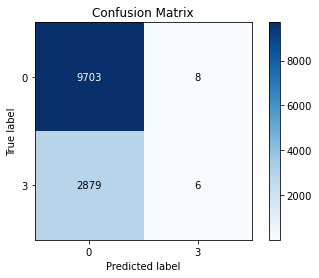

Accuracy: 0.77080 
Precision: 0.42857 
Recall: 0.00208 
F-measure: 0.00414 


In [49]:
y_r2l_rfe_prediction = kNN(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

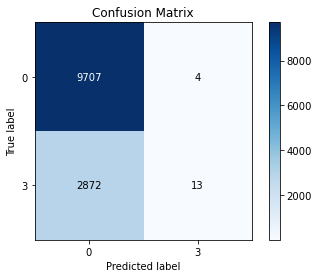

Accuracy: 0.77167 
Precision: 0.76471 
Recall: 0.00451 
F-measure: 0.00896 


In [50]:
y_r2l_rfe_prediction = kNN(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [51]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9995614576320955,
 'Mean Training Precision': 0.8891652512904387,
 'Mean Training Recall': 0.4939643585127264,
 'Mean Training F1 Score': 0.6338382241681825,
 'Mean Validation Accuracy': 0.9994064819556476,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3516666666666667,
 'Mean Validation F1 Score': 0.45071428571428573}

#### K-fold cross validation on u2r Standard Scaler

In [52]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9996092687797706,
 'Mean Training Precision': 0.853600076394194,
 'Mean Training Recall': 0.5983243272079668,
 'Mean Training F1 Score': 0.7026354800753364,
 'Mean Validation Accuracy': 0.9994361643526786,
 'Mean Validation Precision': 0.6966666666666668,
 'Mean Validation Recall': 0.4991666666666667,
 'Mean Validation F1 Score': 0.5723631923631923}

#### Stratified cross validation on u2r

In [53]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9995647549694956,
 'Mean Training Precision': 0.8876690301802505,
 'Mean Training Recall': 0.5,
 'Mean Training F1 Score': 0.6378303158671671,
 'Mean Validation Accuracy': 0.9994064819556477,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3266666666666667,
 'Mean Validation F1 Score': 0.43238095238095237}

#### Stratified cross validation on u2r Standard Scaler

In [54]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.999602674213693,
 'Mean Training Precision': 0.8521666289463843,
 'Mean Training Recall': 0.5897779833487511,
 'Mean Training F1 Score': 0.6960870740299495,
 'Mean Validation Accuracy': 0.9994510033495624,
 'Mean Validation Precision': 0.7547619047619049,
 'Mean Validation Recall': 0.4766666666666667,
 'Mean Validation F1 Score': 0.5601770451770451}

#### Predict on u2r

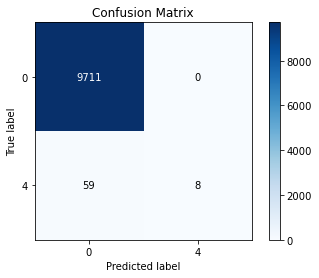

Accuracy: 0.99397 
Precision: 1.00000 
Recall: 0.11940 
F-measure: 0.21333 


In [55]:
y_u2r_rfe_prediction = kNN(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

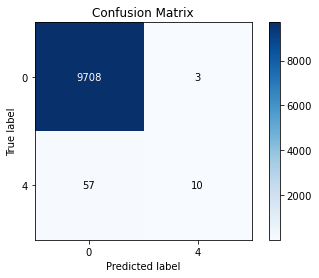

Accuracy: 0.99386 
Precision: 0.76923 
Recall: 0.14925 
F-measure: 0.25000 


In [56]:
y_u2r_rfe_prediction = kNN(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

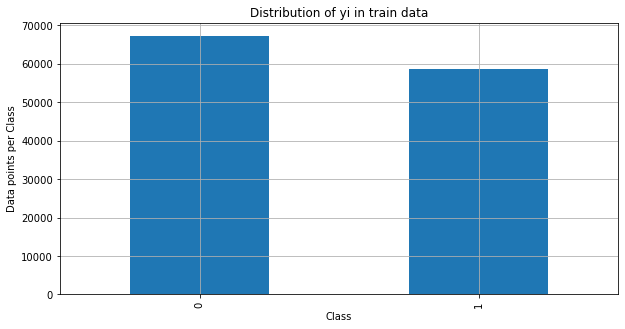

In [57]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareBinary()
plotDf(reducedDf['label'])

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)

#### K-fold cross validation

In [58]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9967585647242678,
 'Mean Training Precision': 0.9957688443545658,
 'Mean Training Recall': 0.9972728860246773,
 'Mean Training F1 Score': 0.9965202940854183,
 'Mean Validation Accuracy': 0.9955863615977734,
 'Mean Validation Precision': 0.9942778903050751,
 'Mean Validation Recall': 0.9962458005008689,
 'Mean Validation F1 Score': 0.9952606578489126}

#### K-fold cross validation Standard Scaler

In [59]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9961420304443658,
 'Mean Training Precision': 0.9955172148984512,
 'Mean Training Recall': 0.9961965691175108,
 'Mean Training F1 Score': 0.9958567477298036,
 'Mean Validation Accuracy': 0.992696854658997,
 'Mean Validation Precision': 0.9913891828343558,
 'Mean Validation Recall': 0.992935579259305,
 'Mean Validation F1 Score': 0.9921611088165301}

#### Predict

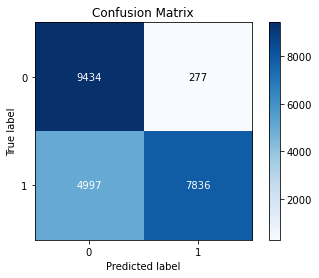

Accuracy: 0.76606 
Precision: 0.96586 
Recall: 0.61061 
F-measure: 0.74821 


In [60]:
y_prediction = kNN(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

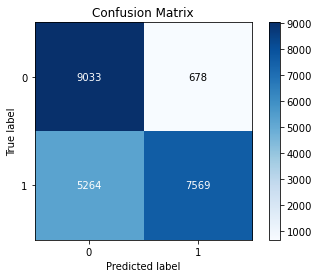

Accuracy: 0.73643 
Precision: 0.91779 
Recall: 0.58981 
F-measure: 0.71812 


In [61]:
y_prediction = kNN(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [62]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df, y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [63]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), x_df_ss, y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [64]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9968000198692953,
 'Mean Training Precision': 0.9960563764675667,
 'Mean Training Recall': 0.9970720094501655,
 'Mean Training F1 Score': 0.9965639305641328,
 'Mean Validation Accuracy': 0.9955466733884064,
 'Mean Validation Precision': 0.9944284017074244,
 'Mean Validation Recall': 0.9960062904008538,
 'Mean Validation F1 Score': 0.9952165364297374}

#### K-fold cross validation Standard Scaler

In [65]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.991293549021768,
 'Mean Training Precision': 0.9889517937711201,
 'Mean Training Recall': 0.9923797744808462,
 'Mean Training F1 Score': 0.9906627567307424,
 'Mean Validation Accuracy': 0.9853460738887538,
 'Mean Validation Precision': 0.9814969648431566,
 'Mean Validation Recall': 0.9871365781279728,
 'Mean Validation F1 Score': 0.9843079447018759}

#### Predict

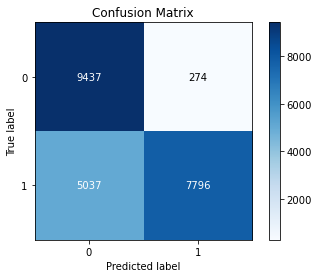

Accuracy: 0.76442 
Precision: 0.96605 
Recall: 0.60750 
F-measure: 0.74592 


In [66]:
y_prediction = kNN(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

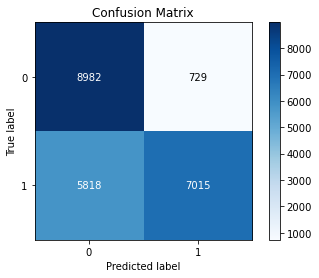

Accuracy: 0.70959 
Precision: 0.90586 
Recall: 0.54664 
F-measure: 0.68183 


In [67]:
y_prediction = kNN(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

# Reduced DF, oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

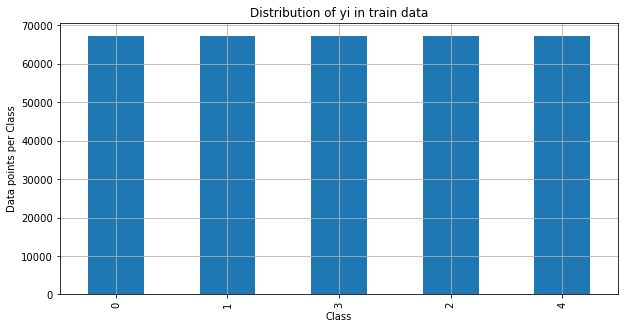

In [68]:
reducedDf = getReducedDf()
reducedDf_test = getReducedDfTest()

reducedDf['label'], reducedDf_test['label'] = prepareMulticlass()

x_df, y_df = getXandY(reducedDf)
x_df_test, y_df_test = getXandY(reducedDf_test)


oversampled_df = overSampledDF(x_df, y_df)
oversampled_df_test = overSampledDF(x_df_test, y_df_test)

plotDf(oversampled_df['label'])

In [69]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(oversampled_df)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(oversampled_df_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)

In [70]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

## No feature selection

#### K-fold cross validation on dos

In [71]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9992179341732939,
 'Mean Training Precision': 0.9987910060397404,
 'Mean Training Recall': 0.9996406281306122,
 'Mean Training F1 Score': 0.9992156346186221,
 'Mean Validation Accuracy': 0.998953130182249,
 'Mean Validation Precision': 0.9980884044085272,
 'Mean Validation Recall': 0.9994363630436759,
 'Mean Validation F1 Score': 0.9987617023392401}

#### K-fold cross validation on dos Standard Scaler

In [72]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9984894905825659,
 'Mean Training Precision': 0.9976612547644225,
 'Mean Training Recall': 0.9993257446637663,
 'Mean Training F1 Score': 0.9984927923542498,
 'Mean Validation Accuracy': 0.9973048579162619,
 'Mean Validation Precision': 0.9951409073961426,
 'Mean Validation Recall': 0.9985429833295534,
 'Mean Validation F1 Score': 0.996837995050063}

#### Stratified cross validation on dos

In [73]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9992220590072692,
 'Mean Training Precision': 0.9987982267274225,
 'Mean Training Recall': 0.999646915355037,
 'Mean Training F1 Score': 0.9992223900422987,
 'Mean Validation Accuracy': 0.998975401345659,
 'Mean Validation Precision': 0.9984722893676607,
 'Mean Validation Recall': 0.9994802759390732,
 'Mean Validation F1 Score': 0.9989759483567482}

#### Stratified cross validation on dos Standard Scaler

In [74]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9984639168569214,
 'Mean Training Precision': 0.9976313768547718,
 'Mean Training Recall': 0.9993004303627664,
 'Mean Training F1 Score': 0.9984652024310154,
 'Mean Validation Accuracy': 0.9972677240588741,
 'Mean Validation Precision': 0.9958549915936977,
 'Mean Validation Recall': 0.998693269250062,
 'Mean Validation F1 Score': 0.9972717722573812}

#### Predict on dos

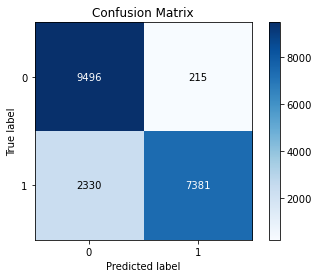

Accuracy: 0.86896 
Precision: 0.97170 
Recall: 0.76007 
F-measure: 0.85295 


In [75]:
y_dos_prediction = kNN(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

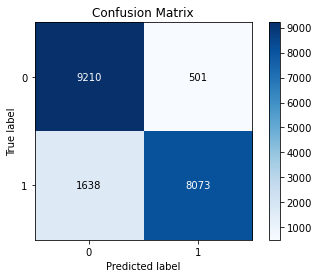

Accuracy: 0.88987 
Precision: 0.94157 
Recall: 0.83133 
F-measure: 0.88302 


In [76]:
y_dos_prediction = kNN(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [77]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9976249284574671,
 'Mean Training Precision': 0.9965813384841473,
 'Mean Training Recall': 0.9986340667453615,
 'Mean Training F1 Score': 0.9976066361424971,
 'Mean Validation Accuracy': 0.9965624255307974,
 'Mean Validation Precision': 0.9849544139601096,
 'Mean Validation Recall': 0.9977387642011852,
 'Mean Validation F1 Score': 0.9912666967065873}

#### K-fold cross validation on probe Standard Scaling

In [78]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9980192614761982,
 'Mean Training Precision': 0.9969303522001642,
 'Mean Training Recall': 0.9990705600286841,
 'Mean Training F1 Score': 0.9979993051787612,
 'Mean Validation Accuracy': 0.9967851669332848,
 'Mean Validation Precision': 0.9854959561792491,
 'Mean Validation Recall': 0.9977590189575694,
 'Mean Validation F1 Score': 0.9915543453214235}

#### Stratified cross validation on probe

In [79]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9976241034906721,
 'Mean Training Precision': 0.9966211856603312,
 'Mean Training Recall': 0.9986338593428931,
 'Mean Training F1 Score': 0.9976265030495106,
 'Mean Validation Accuracy': 0.9968890630131255,
 'Mean Validation Precision': 0.9955141466356334,
 'Mean Validation Recall': 0.9982774710391638,
 'Mean Validation F1 Score': 0.996893518988661}

#### Stratified cross validation on probe Standard Scaling

In [80]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9980159614048484,
 'Mean Training Precision': 0.996947604635402,
 'Mean Training Recall': 0.9990908895726504,
 'Mean Training F1 Score': 0.9980180917400393,
 'Mean Validation Accuracy': 0.9970004265479059,
 'Mean Validation Precision': 0.9956618257369236,
 'Mean Validation Recall': 0.9983516990643938,
 'Mean Validation F1 Score': 0.9970045235343628}

#### Predict on probe

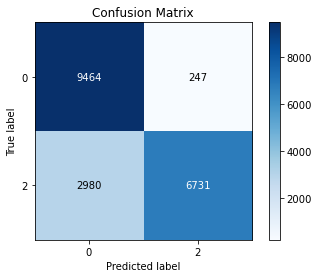

Accuracy: 0.83385 
Precision: 0.96460 
Recall: 0.69313 
F-measure: 0.80664 


In [81]:
y_probe_rfe_prediction = kNN(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

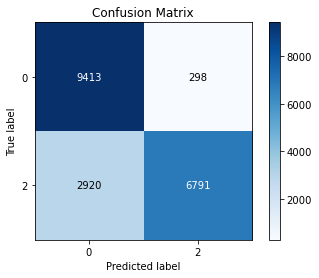

Accuracy: 0.83431 
Precision: 0.95796 
Recall: 0.69931 
F-measure: 0.80845 


In [82]:
y_probe_rfe_prediction = kNN(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [83]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9974879844186553,
 'Mean Training Precision': 0.9969341595793585,
 'Mean Training Recall': 0.9979848653232504,
 'Mean Training F1 Score': 0.997459232121218,
 'Mean Validation Accuracy': 0.9959164493335553,
 'Mean Validation Precision': 0.8734899330125778,
 'Mean Validation Recall': 0.9973182041220875,
 'Mean Validation F1 Score': 0.926346366435242}

#### K-fold cross validation on r2l Standard Scaling

In [84]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9981801293342867,
 'Mean Training Precision': 0.9968153626276909,
 'Mean Training Recall': 0.9995055448708812,
 'Mean Training F1 Score': 0.9981586305193787,
 'Mean Validation Accuracy': 0.9969188159644021,
 'Mean Validation Precision': 0.8731074127882728,
 'Mean Validation Recall': 0.9973634673190175,
 'Mean Validation F1 Score': 0.9261084465695463}

#### Stratified cross validation on r2l

In [85]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9974945841257934,
 'Mean Training Precision': 0.9969640796562309,
 'Mean Training Recall': 0.9980283356072436,
 'Mean Training F1 Score': 0.997495921240296,
 'Mean Validation Accuracy': 0.9964955536063267,
 'Mean Validation Precision': 0.9957160449393351,
 'Mean Validation Recall': 0.9972825597324482,
 'Mean Validation F1 Score': 0.9964984030066484}

#### Stratified cross validation on r2l Standard Scaling

In [86]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9981718796663358,
 'Mean Training Precision': 0.9968275314255705,
 'Mean Training Recall': 0.9995248207865892,
 'Mean Training F1 Score': 0.9981743518319611,
 'Mean Validation Accuracy': 0.9973122641806285,
 'Mean Validation Precision': 0.9955027739810124,
 'Mean Validation Recall': 0.9991387322122289,
 'Mean Validation F1 Score': 0.9973172598326568}

#### Predict on r2l

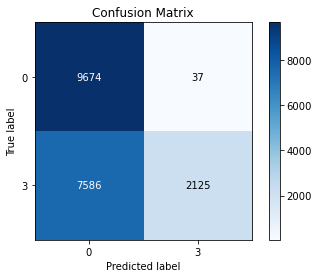

Accuracy: 0.60751 
Precision: 0.98289 
Recall: 0.21882 
F-measure: 0.35796 


In [87]:
y_r2l_rfe_prediction = kNN(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

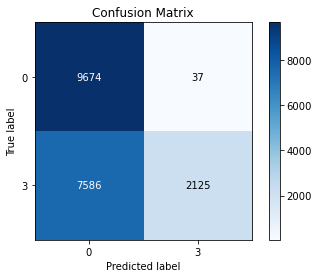

Accuracy: 0.60751 
Precision: 0.98289 
Recall: 0.21882 
F-measure: 0.35796 


In [88]:
y_probe_rfy_r2l_rfe_predictione_prediction = kNN(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [89]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9981050575328807,
 'Mean Training Precision': 0.9967892066028681,
 'Mean Training Recall': 0.9993800771053601,
 'Mean Training F1 Score': 0.9980829454744816,
 'Mean Validation Accuracy': 0.9965698615635509,
 'Mean Validation Precision': 0.5614975045652353,
 'Mean Validation Recall': 0.999316357062836,
 'Mean Validation F1 Score': 0.6090176618441193}

#### K-fold cross validation on u2r Standard Scaling

In [90]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9995223458589999,
 'Mean Training Precision': 0.9990876002776918,
 'Mean Training Recall': 0.9999420914843519,
 'Mean Training F1 Score': 0.9995146598526589,
 'Mean Validation Accuracy': 0.9992798249962849,
 'Mean Validation Precision': 0.6789411168541604,
 'Mean Validation Recall': 0.9741978470851709,
 'Mean Validation F1 Score': 0.7595382241934346}

#### Stratified cross validation on u2r

In [91]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9980992825815627,
 'Mean Training Precision': 0.9968221746132434,
 'Mean Training Recall': 0.9993845767444773,
 'Mean Training F1 Score': 0.9981017267615279,
 'Mean Validation Accuracy': 0.9970524038049466,
 'Mean Validation Precision': 0.9952948906655351,
 'Mean Validation Recall': 0.9988268907199865,
 'Mean Validation F1 Score': 0.9970576629512896}

#### Stratified cross validation on u2r Standard Scaling

In [92]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9995223458726112,
 'Mean Training Precision': 0.9991015489116588,
 'Mean Training Recall': 0.9999439024484899,
 'Mean Training F1 Score': 0.9995225476290622,
 'Mean Validation Accuracy': 0.9993169312903518,
 'Mean Validation Precision': 0.9987689639273883,
 'Mean Validation Recall': 0.9998663542761538,
 'Mean Validation F1 Score': 0.9993173345386024}

#### Predict on u2r

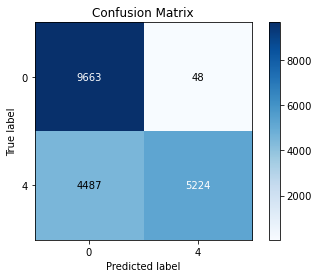

Accuracy: 0.76650 
Precision: 0.99090 
Recall: 0.53795 
F-measure: 0.69732 


In [93]:
y_u2r_rfe_prediction = kNN(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

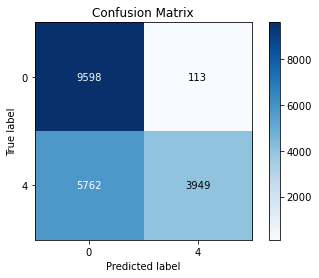

Accuracy: 0.69751 
Precision: 0.97218 
Recall: 0.40665 
F-measure: 0.57344 


In [94]:
y_u2r_rfe_prediction = kNN(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

## Feature selection

In [95]:
X_dos_rfe, rfecolname_dos = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos, y_dos, 13)
X_probe_rfe, rfecolname_probe = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe, y_probe, 13)
X_r2l_rfe, rfecolname_r2l = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l, y_r2l, 13)
X_u2r_rfe, rfecolname_u2r = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r, y_u2r, 13)

X_dos_test_rfe=X_dos_test.values[:,rfecolname_dos]
X_probe_test_rfe=X_probe_test.values[:,rfecolname_probe]
X_r2l_test_rfe=X_r2l_test.values[:,rfecolname_r2l]
X_u2r_test_rfe=X_u2r_test.values[:,rfecolname_u2r]

In [96]:
X_dos_rfe_ss, rfecolname_dosSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_dos_ss, y_dos, 13)
X_probe_rfe_ss, rfecolname_probeSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_probe_ss, y_probe, 13)
X_r2l_rfe_ss, rfecolname_r2lSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_r2l_ss, y_r2l, 13)
X_u2r_rfe_ss, rfecolname_u2rSS = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), X_u2r_ss, y_u2r, 13)

X_dos_test_rfe_ss=X_dos_test_ss[:,rfecolname_dosSS]
X_probe_test_rfe_ss=X_probe_test_ss[:,rfecolname_probeSS]
X_r2l_test_rfe_ss=X_r2l_test_ss[:,rfecolname_r2lSS]
X_u2r_test_rfe_ss=X_u2r_test_ss[:,rfecolname_u2rSS]

#### K-fold cross validation on dos

In [97]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9994373745377205,
 'Mean Training Precision': 0.9994411808111764,
 'Mean Training Recall': 0.9994302389835619,
 'Mean Training F1 Score': 0.999435708544692,
 'Mean Validation Accuracy': 0.9992129900066645,
 'Mean Validation Precision': 0.9990026479568035,
 'Mean Validation Recall': 0.9991933644311395,
 'Mean Validation F1 Score': 0.9990979485881653}

#### K-fold cross validation on dos Standard Scaler

In [98]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=59387, 1=61830, Test: 0=7956, 1=5513
>Train: 0=59336, 1=61881, Test: 0=8007, 1=5462
>Train: 0=59437, 1=61780, Test: 0=7906, 1=5563
>Train: 0=59306, 1=61911, Test: 0=8037, 1=5432
>Train: 0=59299, 1=61918, Test: 0=8044, 1=5425
>Train: 0=59294, 1=61923, Test: 0=8049, 1=5420
>Train: 0=59294, 1=61924, Test: 0=8049, 1=5419
>Train: 0=59327, 1=61891, Test: 0=8016, 1=5452
>Train: 0=64064, 1=57154, Test: 0=3279, 1=10189
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9972173959019583,
 'Mean Training Precision': 0.9959382186812948,
 'Mean Training Recall': 0.9985124527989923,
 'Mean Training F1 Score': 0.9972236404844278,
 'Mean Validation Accuracy': 0.9954412764216759,
 'Mean Validation Precision': 0.9920756464231388,
 'Mean Validation Recall': 0.9973786669088633,
 'Mean Validation F1 Score': 0.9947171916893849}

#### Stratified cross validation on dos

In [99]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9994447992048482,
 'Mean Training Precision': 0.9994456250597032,
 'Mean Training Recall': 0.9994439740542764,
 'Mean Training F1 Score': 0.9994447981081898,
 'Mean Validation Accuracy': 0.9991981383380152,
 'Mean Validation Precision': 0.9991537188334838,
 'Mean Validation Recall': 0.9992426823161791,
 'Mean Validation F1 Score': 0.9991981697409681}

#### Stratified cross validation on dos Standard Scaler

In [100]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_rfe_ss), y_dos, 10, 1)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9971868724572112,
 'Mean Training Precision': 0.9959039521026563,
 'Mean Training Recall': 0.9984804159137275,
 'Mean Training F1 Score': 0.9971905115345923,
 'Mean Validation Accuracy': 0.9955155088554004,
 'Mean Validation Precision': 0.9934938072606494,
 'Mean Validation Recall': 0.9975647364734226,
 'Mean Validation F1 Score': 0.9955247035115633}

#### Predict on dos

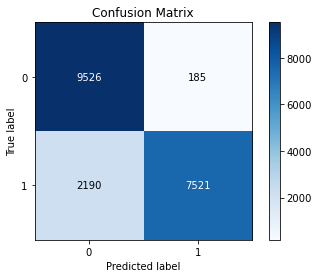

Accuracy: 0.87772 
Precision: 0.97599 
Recall: 0.77448 
F-measure: 0.86364 


In [101]:
y_dos_rfe_prediction = kNN(X_dos_rfe, y_dos).predict(X_dos_test_rfe)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

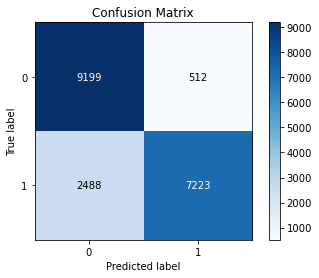

Accuracy: 0.84554 
Precision: 0.93381 
Recall: 0.74380 
F-measure: 0.82804 


In [102]:
y_dos_rfe_prediction = kNN(X_dos_rfe_ss, y_dos).predict(X_dos_test_rfe_ss)
plotConfusionMatrix(y_dos_rfe_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [103]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9977734219837705,
 'Mean Training Precision': 0.9969615573150724,
 'Mean Training Recall': 0.9985514730844537,
 'Mean Training F1 Score': 0.9977558742194856,
 'Mean Validation Accuracy': 0.9968519754621173,
 'Mean Validation Precision': 0.9871036633431899,
 'Mean Validation Recall': 0.9977120748026514,
 'Mean Validation F1 Score': 0.9923511239428265}

#### K-fold cross validation on probe Standard Scaler

In [104]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=55814, 1=65403, Test: 0=11529, 1=1940
>Train: 0=55943, 1=65274, Test: 0=11400, 1=2069
>Train: 0=55894, 1=65323, Test: 0=11449, 1=2020
>Train: 0=55775, 1=65442, Test: 0=11568, 1=1901
>Train: 0=55895, 1=65322, Test: 0=11448, 1=2021
>Train: 0=57394, 1=63823, Test: 0=9949, 1=3520
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9980365856155593,
 'Mean Training Precision': 0.9968619120905888,
 'Mean Training Recall': 0.9991793690164237,
 'Mean Training F1 Score': 0.9980192898037272,
 'Mean Validation Accuracy': 0.9967851680358176,
 'Mean Validation Precision': 0.9848093553030448,
 'Mean Validation Recall': 0.9983445126992523,
 'Mean Validation F1 Score': 0.9914875131375143}

#### Stratified cross validation on probe

In [105]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9977676472570387,
 'Mean Training Precision': 0.996978842445896,
 'Mean Training Recall': 0.9985612625099259,
 'Mean Training F1 Score': 0.9977694202621608,
 'Mean Validation Accuracy': 0.9970524010486146,
 'Mean Validation Precision': 0.9958972286697806,
 'Mean Validation Recall': 0.9982180731846656,
 'Mean Validation F1 Score': 0.9970560158709028}

#### Stratified cross validation on probe Standard Scaler

In [106]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_rfe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.998019261251612,
 'Mean Training Precision': 0.996864184982565,
 'Mean Training Recall': 0.9991816357159449,
 'Mean Training F1 Score': 0.9980215625505764,
 'Mean Validation Accuracy': 0.997059833222503,
 'Mean Validation Precision': 0.9954859791371176,
 'Mean Validation Recall': 0.9986487037711982,
 'Mean Validation F1 Score': 0.9970646212352502}

#### Predict on probe

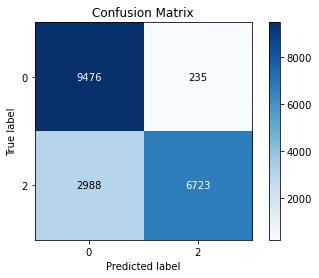

Accuracy: 0.83405 
Precision: 0.96623 
Recall: 0.69231 
F-measure: 0.80665 


In [107]:
y_probe_rfe_prediction = kNN(X_probe_rfe, y_probe).predict(X_probe_test_rfe)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

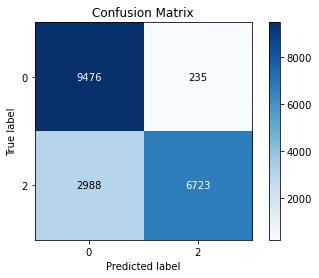

Accuracy: 0.83405 
Precision: 0.96623 
Recall: 0.69231 
F-measure: 0.80665 


In [108]:
y_r2l_rfe_prediction = kNN(X_probe_rfe_ss, y_probe).predict(X_probe_test_rfe_ss)
plotConfusionMatrix(y_probe_rfe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [109]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9971563488082944,
 'Mean Training Precision': 0.9966781084319554,
 'Mean Training Recall': 0.997572462042514,
 'Mean Training F1 Score': 0.9971250795145471,
 'Mean Validation Accuracy': 0.9952853496119515,
 'Mean Validation Precision': 0.8626659609111282,
 'Mean Validation Recall': 0.9965025631264547,
 'Mean Validation F1 Score': 0.9188354879113207}

#### K-fold cross validation on r2l Standard Scaler

In [110]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=54080, 1=67137, Test: 0=13263, 1=206
>Train: 0=54094, 1=67123, Test: 0=13249, 1=220
>Train: 0=54054, 1=67163, Test: 0=13289, 1=180
>Train: 0=54045, 1=67172, Test: 0=13298, 1=171
>Train: 0=54082, 1=67135, Test: 0=13261, 1=208
>Train: 0=66360, 1=54857, Test: 0=983, 1=12486
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9970458039859569,
 'Mean Training Precision': 0.9952637212182005,
 'Mean Training Recall': 0.9987538139833896,
 'Mean Training F1 Score': 0.997005686780936,
 'Mean Validation Accuracy': 0.9954710139374925,
 'Mean Validation Precision': 0.8416001278535001,
 'Mean Validation Recall': 0.9926526386195207,
 'Mean Validation F1 Score': 0.9030773444739675}

#### Stratified cross validation on r2l

In [111]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9971423244000006,
 'Mean Training Precision': 0.9966654023465423,
 'Mean Training Recall': 0.99762245316906,
 'Mean Training F1 Score': 0.9971436946772906,
 'Mean Validation Accuracy': 0.9959090061343383,
 'Mean Validation Precision': 0.9951531117535435,
 'Mean Validation Recall': 0.9966737399922257,
 'Mean Validation F1 Score': 0.9959123247578401}

#### Stratified cross validation on r2l Standard Scaler

In [112]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_rfe_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9970400289733881,
 'Mean Training Precision': 0.9952945048174856,
 'Mean Training Recall': 0.9988021521607602,
 'Mean Training F1 Score': 0.9970452387801167,
 'Mean Validation Accuracy': 0.9958570338386956,
 'Mean Validation Precision': 0.9937021275213219,
 'Mean Validation Recall': 0.9980398685966614,
 'Mean Validation F1 Score': 0.9958660641501351}

#### Predict on r2l

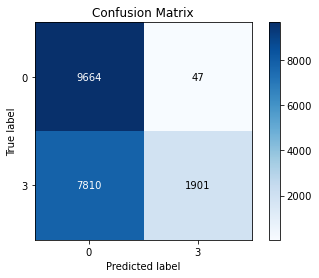

Accuracy: 0.59546 
Precision: 0.97587 
Recall: 0.19576 
F-measure: 0.32610 


In [113]:
y_r2l_rfe_prediction = kNN(X_r2l_rfe, y_r2l).predict(X_r2l_test_rfe)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

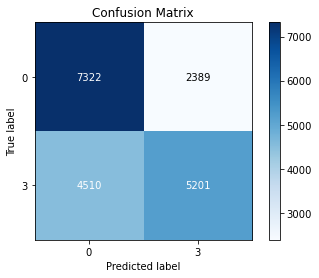

Accuracy: 0.64478 
Precision: 0.68524 
Recall: 0.53558 
F-measure: 0.60124 


In [114]:
y_r2l_rfe_prediction = kNN(X_r2l_rfe_ss, y_r2l).predict(X_r2l_test_rfe_ss)
plotConfusionMatrix(y_r2l_rfe_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [115]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9981174319939731,
 'Mean Training Precision': 0.9968143003560488,
 'Mean Training Recall': 0.9993800771053601,
 'Mean Training F1 Score': 0.9980955253005522,
 'Mean Validation Accuracy': 0.9965772860197093,
 'Mean Validation Precision': 0.5616596667273975,
 'Mean Validation Recall': 0.999316357062836,
 'Mean Validation F1 Score': 0.6092758374034997}

#### K-fold cross validation on u2r Standard Scaler

In [116]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=53885, 1=67332, Test: 0=13458, 1=11
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53886, 1=67331, Test: 0=13457, 1=12
>Train: 0=53882, 1=67335, Test: 0=13461, 1=8
>Train: 0=53883, 1=67334, Test: 0=13460, 1=9
>Train: 0=67293, 1=53924, Test: 0=50, 1=13419
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468
>Train: 0=67343, 1=53875, Test: 0=0, 1=13468


{'Mean Training Accuracy': 0.9993680776059648,
 'Mean Training Precision': 0.9987586899476051,
 'Mean Training Recall': 0.9999573111636263,
 'Mean Training F1 Score': 0.9993576329506926,
 'Mean Validation Accuracy': 0.9991090625046375,
 'Mean Validation Precision': 0.6542408390795488,
 'Mean Validation Recall': 0.9825311804185045,
 'Mean Validation F1 Score': 0.7328184401884785}

#### Stratified cross validation on u2r

In [117]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9981124820162556,
 'Mean Training Precision': 0.9968484209854415,
 'Mean Training Recall': 0.9993845767444773,
 'Mean Training F1 Score': 0.9981148839866462,
 'Mean Validation Accuracy': 0.9970598282611054,
 'Mean Validation Precision': 0.9953096092443994,
 'Mean Validation Recall': 0.9988268907199865,
 'Mean Validation F1 Score': 0.9970650533504504}

#### Stratified cross validation on u2r Standard Scaler

In [118]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_rfe_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60608, 1=60609, Test: 0=6735, 1=6734
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60608, Test: 0=6734, 1=6735
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734
>Train: 0=60609, 1=60609, Test: 0=6734, 1=6734


{'Mean Training Accuracy': 0.9993680775719366,
 'Mean Training Precision': 0.998778851486005,
 'Mean Training Recall': 0.9999587518099684,
 'Mean Training F1 Score': 0.9993684520682207,
 'Mean Validation Accuracy': 0.9991684377570487,
 'Mean Validation Precision': 0.9984580596428622,
 'Mean Validation Recall': 0.9998812042910039,
 'Mean Validation F1 Score': 0.999169076666942}

#### Predict on u2r

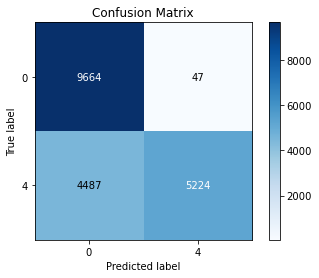

Accuracy: 0.76655 
Precision: 0.99108 
Recall: 0.53795 
F-measure: 0.69737 


In [119]:
y_u2r_rfe_prediction = kNN(X_u2r_rfe, y_u2r).predict(X_u2r_test_rfe)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

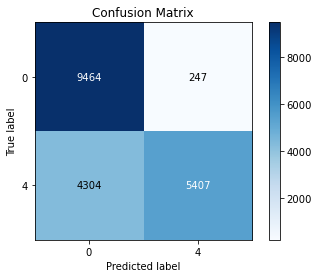

Accuracy: 0.76568 
Precision: 0.95631 
Recall: 0.55679 
F-measure: 0.70381 


In [120]:
y_u2r_rfe_prediction = kNN(X_u2r_rfe_ss, y_u2r).predict(X_u2r_test_rfe_ss)
plotConfusionMatrix(y_u2r_rfe_prediction, y_u2r_test, 4)

# Full DF, no Oversampling

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

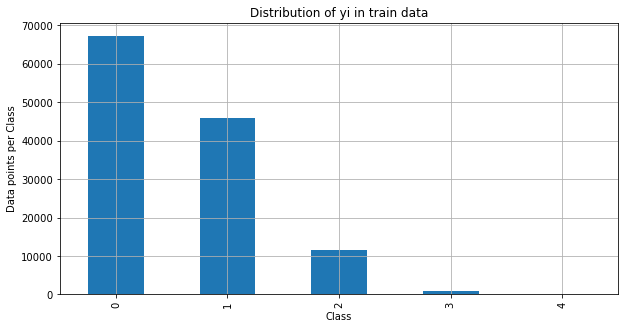

In [121]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()


fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

fullDf['label'], fullDf_test['label'] = prepareMulticlass()

plotDf(fullDf['label'])

In [122]:
#Preparo i dataframe per ogni classe di attacco
dos, probe, r2l, u2r = createMulticlassDF(fullDf)
dos_test, probe_test, r2l_test, u2r_test = createMulticlassDF(fullDf_test)

X_dos, y_dos = getXandY(dos)
X_probe, y_probe = getXandY(probe)
X_r2l, y_r2l = getXandY(r2l)
X_u2r, y_u2r = getXandY(u2r)

X_dos_test, y_dos_test = getXandY(dos_test)
X_probe_test, y_probe_test = getXandY(probe_test)
X_r2l_test, y_r2l_test = getXandY(r2l_test)
X_u2r_test, y_u2r_test = getXandY(u2r_test)


In [123]:
#Effettuo standard scaler
X_dos_ss=standardScaler(X_dos)
X_probe_ss=standardScaler(X_probe)
X_r2l_ss=standardScaler(X_r2l)
X_u2r_ss=standardScaler(X_u2r)

X_dos_test_ss=standardScaler(X_dos_test)
X_probe_test_ss=standardScaler(X_probe_test)
X_r2l_test_ss=standardScaler(X_r2l_test)
X_u2r_test_ss=standardScaler(X_u2r_test)

#### K-fold cross validation on dos

In [124]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.9991151918228814,
 'Mean Training Precision': 0.9984193873660209,
 'Mean Training Recall': 0.9993999935268614,
 'Mean Training F1 Score': 0.9989094462542185,
 'Mean Validation Accuracy': 0.9987728436479208,
 'Mean Validation Precision': 0.9979345426545919,
 'Mean Validation Recall': 0.9990420448438014,
 'Mean Validation F1 Score': 0.9984879091461882}

#### K-fold cross validation on dos Standard Scaling

In [125]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60666, 1=41277, Test: 0=6677, 1=4650
>Train: 0=60586, 1=41357, Test: 0=6757, 1=4570
>Train: 0=60612, 1=41331, Test: 0=6731, 1=4596
>Train: 0=60720, 1=41223, Test: 0=6623, 1=4704
>Train: 0=60634, 1=41309, Test: 0=6709, 1=4618
>Train: 0=60525, 1=41418, Test: 0=6818, 1=4509
>Train: 0=60548, 1=41395, Test: 0=6795, 1=4532
>Train: 0=60557, 1=41386, Test: 0=6786, 1=4541
>Train: 0=60662, 1=41281, Test: 0=6681, 1=4646
>Train: 0=60577, 1=41366, Test: 0=6766, 1=4561


{'Mean Training Accuracy': 0.999470292222124,
 'Mean Training Precision': 0.9992743179672905,
 'Mean Training Recall': 0.9994193763281295,
 'Mean Training F1 Score': 0.9993468399557361,
 'Mean Validation Accuracy': 0.9991612960183633,
 'Mean Validation Precision': 0.998690542610009,
 'Mean Validation Recall': 0.9992372259463524,
 'Mean Validation F1 Score': 0.9989637534927531}

#### Stratified cross validation on dos

In [126]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9991171537035403,
 'Mean Training Precision': 0.9984217563384705,
 'Mean Training Recall': 0.9994024331486733,
 'Mean Training F1 Score': 0.9989118513014427,
 'Mean Validation Accuracy': 0.9987640151849563,
 'Mean Validation Precision': 0.997933973763429,
 'Mean Validation Recall': 0.9990201770835941,
 'Mean Validation F1 Score': 0.9984767185863669}

#### Stratified cross validation on dos Standard Scaling

In [127]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_dos_ss), y_dos, 10, 1)

>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60608, 1=41335, Test: 0=6735, 1=4592
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593
>Train: 0=60609, 1=41334, Test: 0=6734, 1=4593


{'Mean Training Accuracy': 0.9994702922221241,
 'Mean Training Precision': 0.9992743210630083,
 'Mean Training Recall': 0.9994193684764549,
 'Mean Training F1 Score': 0.999346837313702,
 'Mean Validation Accuracy': 0.9991612960183633,
 'Mean Validation Precision': 0.9986944313736956,
 'Mean Validation Recall': 0.9992379044463208,
 'Mean Validation F1 Score': 0.9989660390047952}

#### Predict on dos

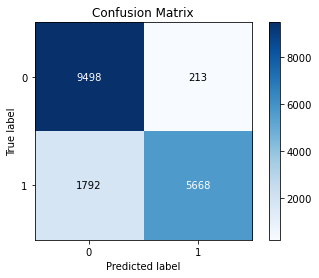

Accuracy: 0.88323 
Precision: 0.96378 
Recall: 0.75979 
F-measure: 0.84971 


In [128]:
y_dos_prediction = kNN(X_dos, y_dos).predict(X_dos_test)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

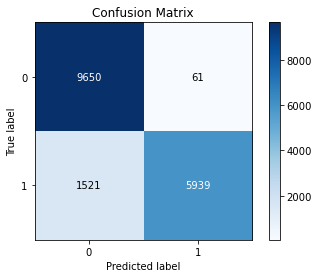

Accuracy: 0.90787 
Precision: 0.98983 
Recall: 0.79611 
F-measure: 0.88247 


In [129]:
y_dos_prediction = kNN(X_dos_ss, y_dos).predict(X_dos_test_ss)
plotConfusionMatrix(y_dos_prediction, y_dos_test, 1)

#### K-fold cross validation on probe

In [130]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.9970435630562001,
 'Mean Training Precision': 0.9870654330160782,
 'Mean Training Recall': 0.9929744494421214,
 'Mean Training F1 Score': 0.9900110531787416,
 'Mean Validation Accuracy': 0.9959619628185589,
 'Mean Validation Precision': 0.9821184534401688,
 'Mean Validation Recall': 0.9906135699161874,
 'Mean Validation F1 Score': 0.9863396174365879}

#### K-fold cross validation on probe Standard Scaling

In [131]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60593, 1=10506, Test: 0=6750, 1=1150
>Train: 0=60590, 1=10509, Test: 0=6753, 1=1147
>Train: 0=60636, 1=10463, Test: 0=6707, 1=1193
>Train: 0=60669, 1=10430, Test: 0=6674, 1=1226
>Train: 0=60629, 1=10470, Test: 0=6714, 1=1186
>Train: 0=60576, 1=10523, Test: 0=6767, 1=1133
>Train: 0=60547, 1=10552, Test: 0=6796, 1=1104
>Train: 0=60628, 1=10471, Test: 0=6715, 1=1185
>Train: 0=60592, 1=10507, Test: 0=6751, 1=1149
>Train: 0=60627, 1=10473, Test: 0=6716, 1=1183


{'Mean Training Accuracy': 0.998383945730947,
 'Mean Training Precision': 0.9962784473570476,
 'Mean Training Recall': 0.9927557508628697,
 'Mean Training F1 Score': 0.994513874779205,
 'Mean Validation Accuracy': 0.9974050328434458,
 'Mean Validation Precision': 0.9945700669525872,
 'Mean Validation Recall': 0.9878091841923972,
 'Mean Validation F1 Score': 0.9911762864707729}

#### Stratified cross validation on probe

In [132]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.9970449695457427,
 'Mean Training Precision': 0.9870750719641267,
 'Mean Training Recall': 0.9929745292596793,
 'Mean Training F1 Score': 0.9900159457570679,
 'Mean Validation Accuracy': 0.9959746210464069,
 'Mean Validation Precision': 0.9822441286579975,
 'Mean Validation Recall': 0.9906487827501673,
 'Mean Validation F1 Score': 0.9864209933982198}

#### Stratified cross validation on probe Standard Scaling

In [133]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_probe_ss), y_probe, 10, 2)

>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60608, 1=10491, Test: 0=6735, 1=1165
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10490, Test: 0=6734, 1=1166
>Train: 0=60609, 1=10491, Test: 0=6734, 1=1165


{'Mean Training Accuracy': 0.998383945730947,
 'Mean Training Precision': 0.996288314618672,
 'Mean Training Recall': 0.9927457444798795,
 'Mean Training F1 Score': 0.9945137682855139,
 'Mean Validation Accuracy': 0.9973923746155977,
 'Mean Validation Precision': 0.9945615554294335,
 'Mean Validation Recall': 0.9877319473788825,
 'Mean Validation F1 Score': 0.99113310330683}

#### Predict on probe

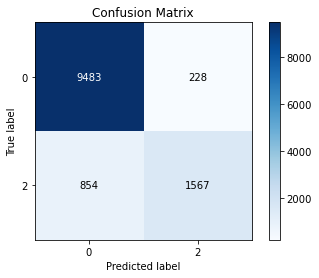

Accuracy: 0.91081 
Precision: 0.87298 
Recall: 0.64725 
F-measure: 0.74336 


In [134]:
y_probe_prediction = kNN(X_probe, y_probe).predict(X_probe_test)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

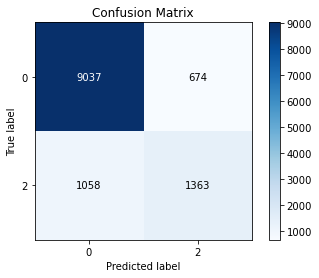

Accuracy: 0.85724 
Precision: 0.66912 
Recall: 0.56299 
F-measure: 0.61148 


In [135]:
y_probe_prediction = kNN(X_probe_ss, y_probe).predict(X_probe_test_ss)
plotConfusionMatrix(y_probe_prediction, y_probe_test, 2)

#### K-fold cross validation on r2l

In [136]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9989789316363964,
 'Mean Training Precision': 0.972002942338704,
 'Mean Training Recall': 0.9574516459112209,
 'Mean Training F1 Score': 0.9646675038934293,
 'Mean Validation Accuracy': 0.9985952354428645,
 'Mean Validation Precision': 0.9568310348216151,
 'Mean Validation Recall': 0.9471053204395808,
 'Mean Validation F1 Score': 0.9518161095395637}

#### K-fold cross validation on r2l Standard Scaling

In [137]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60615, 1=889, Test: 0=6728, 1=106
>Train: 0=60612, 1=892, Test: 0=6731, 1=103
>Train: 0=60628, 1=876, Test: 0=6715, 1=119
>Train: 0=60613, 1=891, Test: 0=6730, 1=104
>Train: 0=60610, 1=894, Test: 0=6733, 1=101
>Train: 0=60591, 1=913, Test: 0=6752, 1=82
>Train: 0=60599, 1=905, Test: 0=6744, 1=90
>Train: 0=60597, 1=907, Test: 0=6746, 1=88
>Train: 0=60614, 1=891, Test: 0=6729, 1=104
>Train: 0=60608, 1=897, Test: 0=6735, 1=98


{'Mean Training Accuracy': 0.9986716354752678,
 'Mean Training Precision': 0.9614458367907515,
 'Mean Training Recall': 0.9467096322443102,
 'Mean Training F1 Score': 0.9540108143834243,
 'Mean Validation Accuracy': 0.9978635523923927,
 'Mean Validation Precision': 0.935545667333977,
 'Mean Validation Recall': 0.9174880590814043,
 'Mean Validation F1 Score': 0.9258146799544773}

#### Stratified cross validation on r2l

In [138]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9989789316628318,
 'Mean Training Precision': 0.9720114175626691,
 'Mean Training Recall': 0.9574542348363927,
 'Mean Training F1 Score': 0.964673682154676,
 'Mean Validation Accuracy': 0.9985806048655835,
 'Mean Validation Precision': 0.9558074461987924,
 'Mean Validation Recall': 0.9467171717171716,
 'Mean Validation F1 Score': 0.9510956762204156}

#### Stratified cross validation on r2l Standard Scaling

In [139]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_r2l_ss), y_r2l, 10, 3)

>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60608, 1=896, Test: 0=6735, 1=99
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=895, Test: 0=6734, 1=100
>Train: 0=60609, 1=896, Test: 0=6734, 1=99
>Train: 0=60609, 1=896, Test: 0=6734, 1=99


{'Mean Training Accuracy': 0.9986732614122131,
 'Mean Training Precision': 0.9616708397476404,
 'Mean Training Recall': 0.9466229798483641,
 'Mean Training F1 Score': 0.9540793636069074,
 'Mean Validation Accuracy': 0.997805025800312,
 'Mean Validation Precision': 0.9343735404604692,
 'Mean Validation Recall': 0.9145454545454544,
 'Mean Validation F1 Score': 0.9239100933165941}

#### Predict on r2l

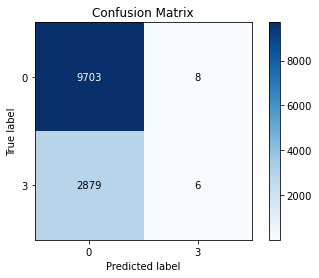

Accuracy: 0.77080 
Precision: 0.42857 
Recall: 0.00208 
F-measure: 0.00414 


In [140]:
y_r2l_prediction = kNN(X_r2l, y_r2l).predict(X_r2l_test)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

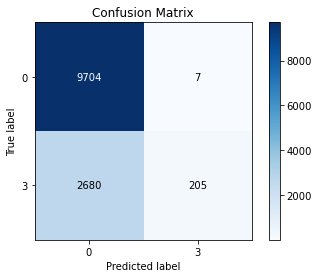

Accuracy: 0.78668 
Precision: 0.96698 
Recall: 0.07106 
F-measure: 0.13239 


In [141]:
y_r2l_prediction = kNN(X_r2l_ss, y_r2l).predict(X_r2l_test_ss)
plotConfusionMatrix(y_r2l_prediction, y_r2l_test, 3)

#### K-fold cross validation on u2r

In [142]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


{'Mean Training Accuracy': 0.9995614576320955,
 'Mean Training Precision': 0.8891652512904387,
 'Mean Training Recall': 0.4939643585127264,
 'Mean Training F1 Score': 0.6338382241681825,
 'Mean Validation Accuracy': 0.9994064819556476,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3516666666666667,
 'Mean Validation F1 Score': 0.45071428571428573}

#### K-fold cross validation on u2r Standard Scaling

In [143]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60607, 1=48, Test: 0=6736, 1=4
>Train: 0=60612, 1=44, Test: 0=6731, 1=8
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60607, 1=49, Test: 0=6736, 1=3


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60608, 1=48, Test: 0=6735, 1=4


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9995845389395347,
 'Mean Training Precision': 0.8066052820357925,
 'Mean Training Recall': 0.6089378607384421,
 'Mean Training F1 Score': 0.6925592915310234,
 'Mean Validation Accuracy': 0.9993322935761235,
 'Mean Validation Precision': 0.5566666666666666,
 'Mean Validation Recall': 0.36,
 'Mean Validation F1 Score': 0.4287057387057387}

#### Stratified cross validation on u2r

In [144]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


{'Mean Training Accuracy': 0.9995647549694956,
 'Mean Training Precision': 0.8876690301802505,
 'Mean Training Recall': 0.5,
 'Mean Training F1 Score': 0.6378303158671671,
 'Mean Validation Accuracy': 0.9994064819556477,
 'Mean Validation Precision': 0.7583333333333334,
 'Mean Validation Recall': 0.3266666666666667,
 'Mean Validation F1 Score': 0.43238095238095237}

#### Stratified cross validation on u2r Standard Scaling

In [145]:
stratifiedCV(KNeighborsClassifier(), pd.DataFrame(X_u2r_ss), y_u2r, 10, 4)

>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60608, 1=47, Test: 0=6735, 1=5
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=46, Test: 0=6734, 1=6
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5
>Train: 0=60609, 1=47, Test: 0=6734, 1=5


C:\Users\Daniele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Mean Training Accuracy': 0.9995795930149765,
 'Mean Training Precision': 0.8036801467401687,
 'Mean Training Recall': 0.6026827012025902,
 'Mean Training F1 Score': 0.688262629626363,
 'Mean Validation Accuracy': 0.9993322935761235,
 'Mean Validation Precision': 0.6333333333333333,
 'Mean Validation Recall': 0.34,
 'Mean Validation F1 Score': 0.40894660894660895}

#### Predict on u2r

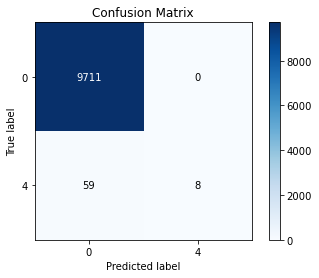

Accuracy: 0.99397 
Precision: 1.00000 
Recall: 0.11940 
F-measure: 0.21333 


In [146]:
y_u2r_prediction = kNN(X_u2r, y_u2r).predict(X_u2r_test)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

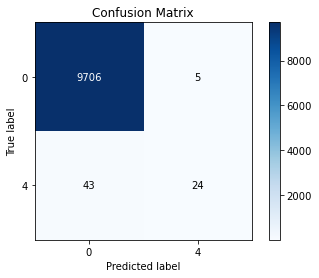

Accuracy: 0.99509 
Precision: 0.82759 
Recall: 0.35821 
F-measure: 0.50000 


In [147]:
y_u2r_prediction = kNN(X_u2r_ss, y_u2r).predict(X_u2r_test_ss)
plotConfusionMatrix(y_u2r_prediction, y_u2r_test, 4)

## Binary dataset no feature selection

<module 'matplotlib.pyplot' from 'C:\\Users\\Daniele\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

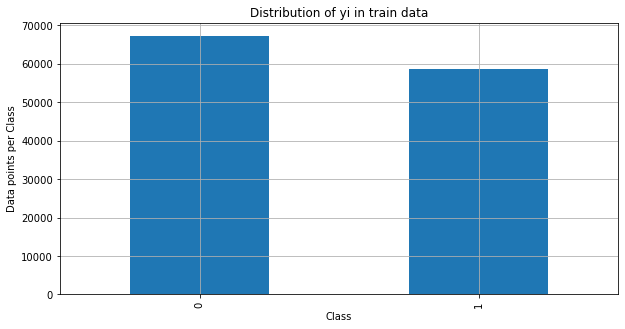

In [148]:
fullDf = getFullDf()
fullDf_test = getFullDfTest()

fullDf['label'], fullDf_test['label'] = prepareBinary()

fullDf=oneHotEcoding(fullDf, 'protocol_type')
fullDf=oneHotEcoding(fullDf, 'service')
fullDf=oneHotEcoding(fullDf, 'flag')
fullDf_test=oneHotEcoding(fullDf_test, 'protocol_type')
fullDf_test=oneHotEcoding(fullDf_test, 'service')
fullDf_test=oneHotEcoding(fullDf_test, 'flag')

fullDf_test=adaptTestset(fullDf, fullDf_test)

colNames=list(fullDf)
colNames_test=list(fullDf_test)

plotDf(fullDf['label'])


In [149]:
x_df, y_df = getXandY(fullDf)
x_df_test, y_df_test = getXandY(fullDf_test)

x_df_ss = standardScaler(x_df)
x_df_test_ss = standardScaler(x_df_test)


In [150]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(x_df), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9968538232055943,
 'Mean Training Precision': 0.9959742733010291,
 'Mean Training Recall': 0.997270990144773,
 'Mean Training F1 Score': 0.9966222060591923,
 'Mean Validation Accuracy': 0.995673681455591,
 'Mean Validation Precision': 0.9944313003631763,
 'Mean Validation Recall': 0.9962801166523523,
 'Mean Validation F1 Score': 0.9953546351656712}

In [151]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(x_df_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9978460993477208,
 'Mean Training Precision': 0.9980446730477182,
 'Mean Training Recall': 0.997326046103403,
 'Mean Training F1 Score': 0.9976852245501006,
 'Mean Validation Accuracy': 0.9964833766303064,
 'Mean Validation Precision': 0.9968877427527891,
 'Mean Validation Recall': 0.9955463193636997,
 'Mean Validation F1 Score': 0.9962163288215216}

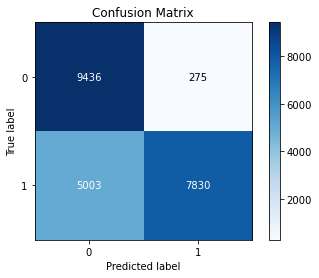

Accuracy: 0.76588 
Precision: 0.96607 
Recall: 0.61015 
F-measure: 0.74792 


In [152]:
y_prediction = kNN(x_df, y_df).predict(x_df_test)
plotConfusionMatrix(y_prediction, y_df_test, 1)

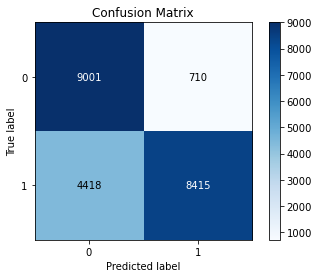

Accuracy: 0.77253 
Precision: 0.92219 
Recall: 0.65573 
F-measure: 0.76646 


In [153]:
y_prediction = kNN(x_df_ss, y_df).predict(x_df_test_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)

## Binary dataset feature selection

In [154]:
X_df_rfe, rfecolname = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df), y_df, 13)
X_df_test_rfe=x_df_test.values[:,rfecolname]

In [155]:
X_df_rfe_ss, rfecolname_ss = recursiveFeatureExtraction(RandomForestClassifier(n_estimators=64,n_jobs=2), pd.DataFrame(x_df_ss), y_df, 13)
X_df_test_rfe_ss=x_df_test_ss[:,rfecolname_ss]

#### K-fold cross validation

In [156]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_df_rfe), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9965124799712214,
 'Mean Training Precision': 0.9964075141255604,
 'Mean Training Recall': 0.9960978807892038,
 'Mean Training F1 Score': 0.9962526642950393,
 'Mean Validation Accuracy': 0.9951418270613119,
 'Mean Validation Precision': 0.9949133164689566,
 'Mean Validation Recall': 0.9946421924527609,
 'Mean Validation F1 Score': 0.9947776634529625}

#### K-fold cross validation Standard Scaler

In [157]:
KfoldCV(KNeighborsClassifier(), pd.DataFrame(X_df_rfe_ss), y_df, 10, 1)

>Train: 0=60653, 1=52722, Test: 0=6690, 1=5908
>Train: 0=60581, 1=52794, Test: 0=6762, 1=5836
>Train: 0=60638, 1=52737, Test: 0=6705, 1=5893
>Train: 0=60750, 1=52626, Test: 0=6593, 1=6004
>Train: 0=60645, 1=52731, Test: 0=6698, 1=5899
>Train: 0=60505, 1=52871, Test: 0=6838, 1=5759
>Train: 0=60507, 1=52869, Test: 0=6836, 1=5761
>Train: 0=60570, 1=52806, Test: 0=6773, 1=5824
>Train: 0=60650, 1=52726, Test: 0=6693, 1=5904
>Train: 0=60588, 1=52788, Test: 0=6755, 1=5842


{'Mean Training Accuracy': 0.9930717078273819,
 'Mean Training Precision': 0.9921941635214637,
 'Mean Training Recall': 0.9929254836738949,
 'Mean Training F1 Score': 0.9925596694921243,
 'Mean Validation Accuracy': 0.9892913531084512,
 'Mean Validation Precision': 0.988015760879582,
 'Mean Validation Recall': 0.9889878509668005,
 'Mean Validation F1 Score': 0.9885006443859845}

#### Predict

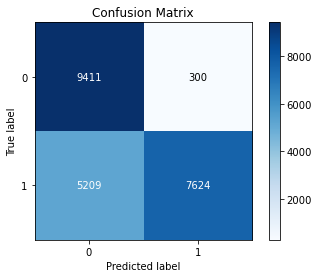

Accuracy: 0.75563 
Precision: 0.96214 
Recall: 0.59409 
F-measure: 0.73460 


In [158]:
y_prediction = kNN(X_df_rfe, y_df).predict(X_df_test_rfe)
plotConfusionMatrix(y_prediction, y_df_test, 1)

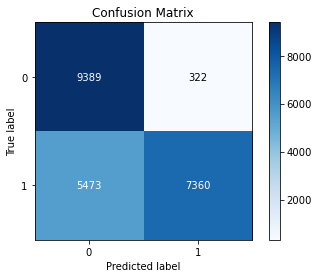

Accuracy: 0.74295 
Precision: 0.95808 
Recall: 0.57352 
F-measure: 0.71752 


In [159]:
y_prediction = kNN(X_df_rfe_ss, y_df).predict(X_df_test_rfe_ss)
plotConfusionMatrix(y_prediction, y_df_test, 1)